In [24]:

import math
from statistics import mean

import matplotlib.pyplot as plt
import pandas as pd
from hurst import compute_Hc
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import coint
from src.pairs.functions import ad_fuller,linear_regression,pairwise_engle_granger_coint,ad_fuller_to_df
from src.pairs.functions import ad_fuller,linear_regression,pairwise_engle_granger_coint,ad_fuller_to_df

# This is a sample Python script.
from datetime import datetime
import time
import pf as pf
import statsmodels.api as sm

from src.pairs import *
import yfinance as yf

from src.pairs.pairs_strategy import *
from src.util.DataFetcher import *


In [18]:
def normalize_start_1(prices):
      return prices/prices.iloc[0]

In [32]:
tickers = ["BTC-USD", "ETH-USD"]

start_date = datetime(2018, 1, 4)
end_date = datetime(2019, 1, 4) #2019-01-04
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)
tickData = tickData.dropna()

tickData = normalize_start_1(tickData)

print(tickData.shape)
# Most Recent Data
tickData.head()
Y = tickData['BTC-USD']
X = tickData['ETH-USD']
print('linear regression OLS lookback window')
regression_model,regression_ln_df,residuals = linear_regression(Y, X)
c = regression_model.params.iloc[0]
beta = regression_model.params.iloc[1]
residuals = residuals

print(beta)

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

(365, 2)
linear regression OLS lookback window
0.45461808092984346


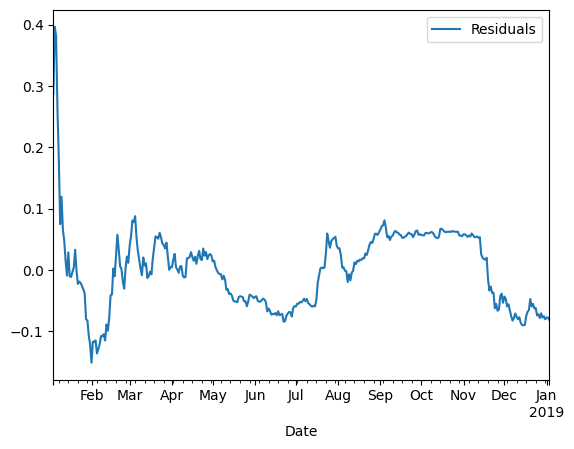

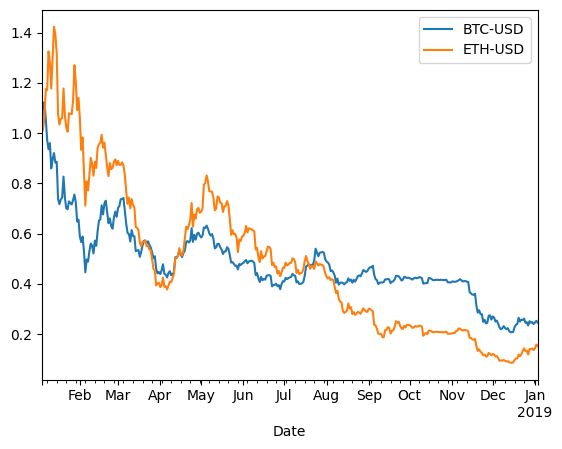

In [33]:
residuals.plot()
tickData.plot()
#manufacture our TEST residuals from model when going forwards (NOT on TRAINING set) - should be same residuals
# this should be a unit test

x_predict = sm.add_constant(X)  # Adding a constant term to the predictor
predicted_y = regression_model.predict(x_predict)
# Calculating residuals
# test['Residual'] = test['Asset_Y'] - test['Predicted_Y'


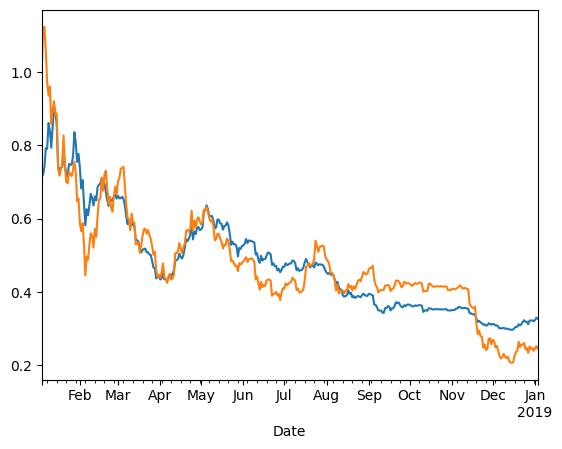

In [39]:
predicted_y.plot()
# Y.plot()
Y.plot()

res_pred = Y - predicted_y

,Residuals
Date,
2018-01-04,0.286937
2018-01-05,0.396484
2018-01-06,0.382361
2018-01-07,0.263417
2018-01-08,0.181749


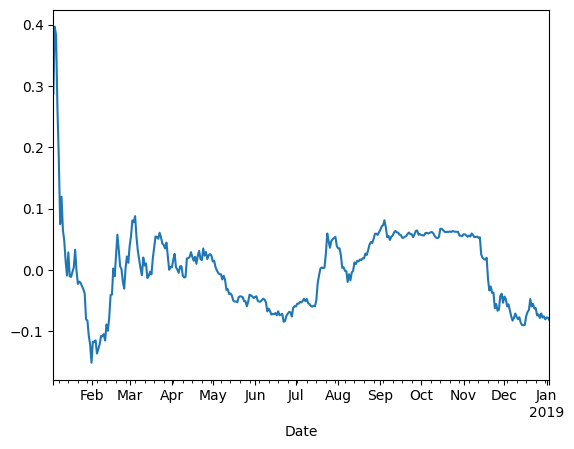

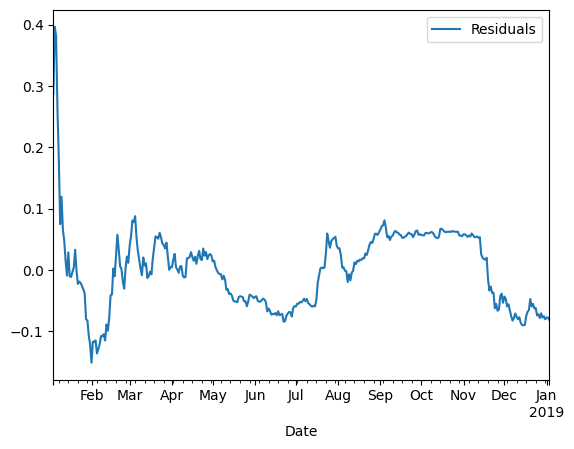

In [48]:
res_pred.plot()
residuals.plot()


residuals.head()
# print(res_pred.to_xarray == residuals.to_xarray)
# res_pred.head()